In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)

In [2]:
ourWorldInData = pd.read_csv('data/our-world-in-data.csv')
ourWorldInData = ourWorldInData.rename(
    columns={'Total confirmed cases of COVID-19 (cases)': 'Cases', 'Entity':'Country'}
)

kaggle = pd.read_csv('data/covid_19_data.csv')
kaggle = kaggle.drop(columns=['Province/State'])
kaggle = kaggle.rename(columns={'Country/Region':'Country', 'Confirmed':'Cases'})
kaggle['Open'] = kaggle['Cases'] - (kaggle['Deaths'] + kaggle['Recovered'])
kaggle['Closed'] = kaggle['Cases'] - kaggle['Open']

covid = kaggle

covid

,SNo,ObservationDate,Country,Last Update,Cases,Deaths,Recovered,Open,Closed
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15764,15765,04/16/2020,US,2020-04-16 23:38:19,296.0,2.0,0.0,294.0,2.0
15765,15766,04/16/2020,Mainland China,2020-04-16 23:38:19,76.0,3.0,73.0,0.0,76.0
15766,15767,04/16/2020,Canada,2020-04-16 23:38:19,8.0,0.0,0.0,8.0,0.0
15767,15768,04/16/2020,Mainland China,2020-04-16 23:38:19,184.0,2.0,176.0,6.0,178.0


In [3]:
RUNNING_AVG_WINDOW = 7

countries = covid['Country'].unique()

def findCountry(term):
    return pd.Series(filter(lambda country: term in country, countries))

def byCountry(country):
    return covid[covid['Country'] == country].reset_index(drop=True)
    
def dailyNewCasesByCountry(country):
    total = byCountry(country)['Cases']
    startingDay0 = total[:-1].reset_index(drop=True)
    startingDay1 = total[1:].reset_index(drop=True)
    return (startingDay1 - startingDay0)

# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def runningAvg(x):
    result = pd.DataFrame(np.convolve(x, np.ones((RUNNING_AVG_WINDOW,))/RUNNING_AVG_WINDOW, mode='valid'))
    return result[0]

def plotTotalCases(country):
    plt.xlabel('Days')
    byCountry(country)['Cases'].plot(title='Total Cases')
    
def plotRecoveries(country):
    plt.xlabel('Days')
    byCountry(country)['Recovered'].plot(title='Total Cases')
    
def plotDeaths(country):
    plt.xlabel('Days')
    byCountry(country)['Deaths'].plot(title='Total Cases')
    
def plotDailyNewCases(country):
    plt.xlabel('Days')
    dailyNewCasesByCountry(country).plot(kind='bar', title='Daily New Cases')
    
def plotNewCasesAvg(country):
    avg = runningAvg(dailyNewCasesByCountry(country))
    avg.index += RUNNING_AVG_WINDOW - 1
    avg.plot(style=['--r'])
    
def plotLogDailyAvgByLogTotalCases(country):
    total = byCountry(country)['Cases']
    dailyAvg = runningAvg(dailyNewCasesByCountry(country))
    plt.title('Avg New Cases vs Total Cases')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.yscale('log')
    plt.ylabel('Avg New Cases')
    plt.plot(total[RUNNING_AVG_WINDOW:], dailyAvg)
    
def plotOutcomeOfCases(country):
    countryData = byCountry(country)
    recoveryRate = (countryData['Recovered'] / countryData['Closed'] * 100)#.fillna(50)
    deathRate = (countryData['Deaths'] / countryData['Closed'] * 100)#.fillna(50)
    plt.title('Outcome of Cases')
    plt.xlabel('Days')
    plt.ylabel('Percent')
    recoveryRate.plot()
    deathRate.plot()
    plt.legend(['recovery rate', 'death rate'])
    
def plotCountryStatus(country):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(country, fontsize=25)

    plt.subplot(221)
    plotTotalCases(country)
    plotDeaths(country)
    plotRecoveries(country)
    plt.legend(['confirmed', 'deaths', 'recoveries'])

    plt.subplot(222)
    plotDailyNewCases(country)
    plotNewCasesAvg(country)
    plt.legend(['avg daily cases', 'daily cases'])

    plt.subplot(223)
    plotLogDailyAvgByLogTotalCases(country)
    
    plt.subplot(224)
    plotOutcomeOfCases(country)

    plt.show()

def plotCountriesStatus(countries):
    for country in countries:
        plotCountryStatus(country)
        
def plotAllInOne(plotFunc, countries):
    for country in countries:
        plotFunc(country)
    plt.legend(countries)
    plt.show()

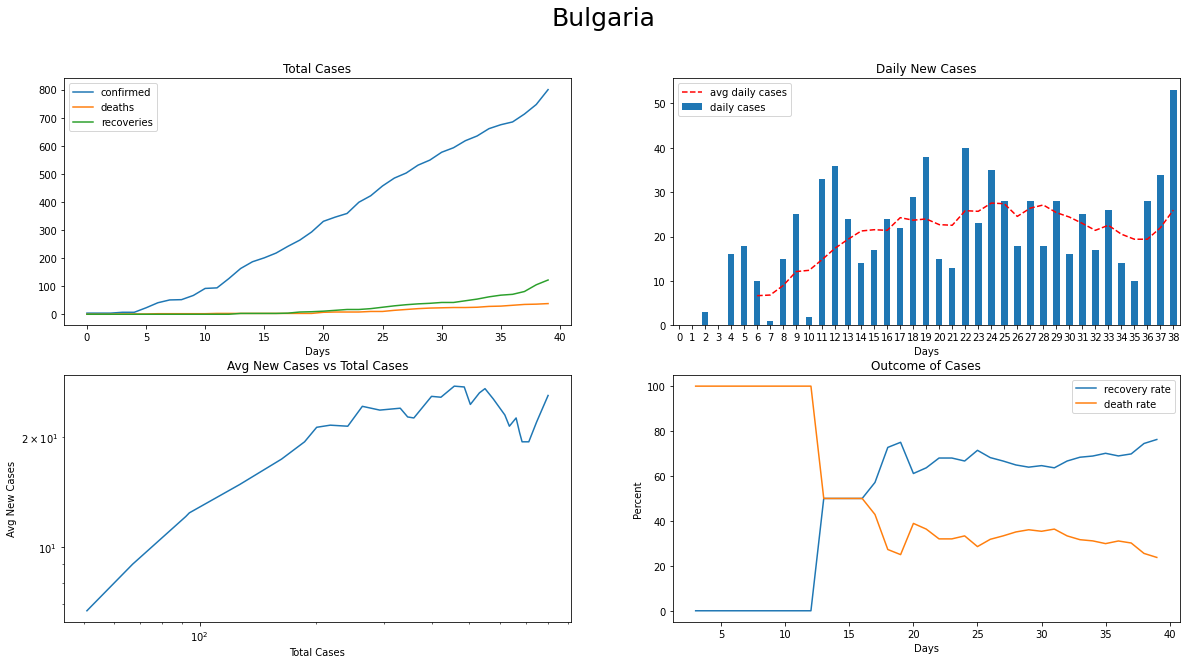

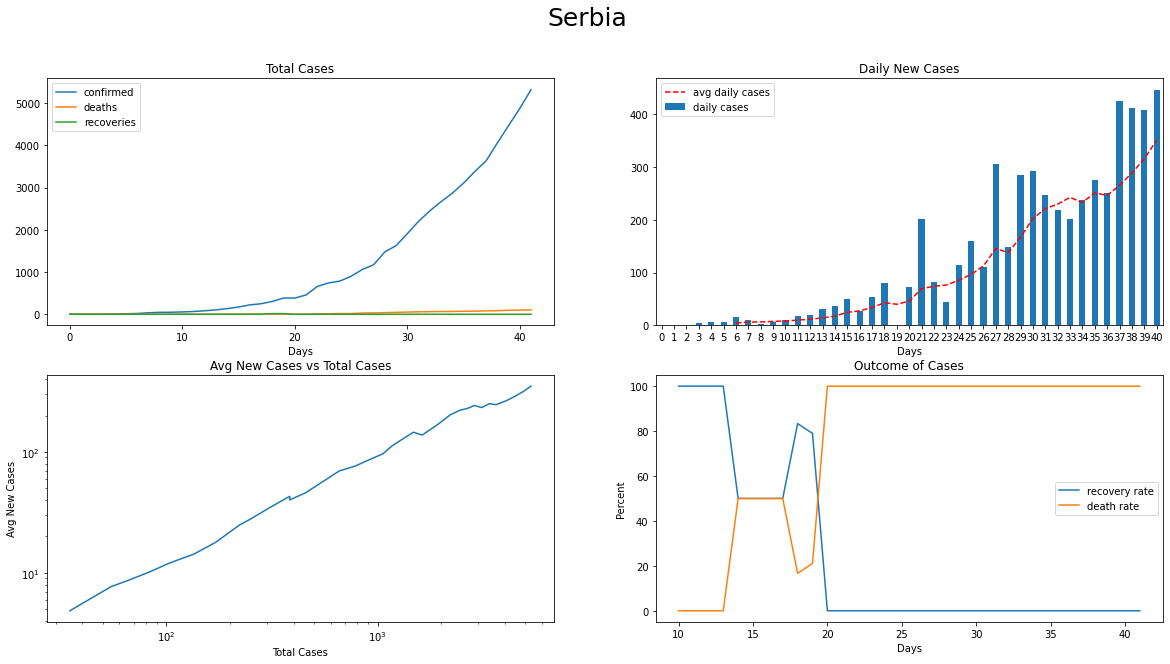

In [4]:
plotCountriesStatus(['Bulgaria', 'Serbia'])

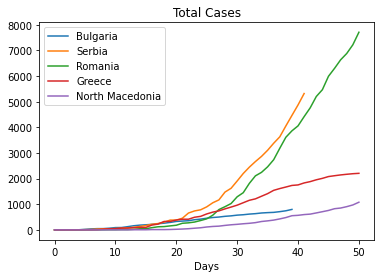

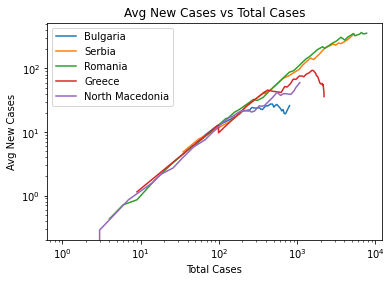

In [5]:
plotAllInOne(plotTotalCases, ['Bulgaria', 'Serbia', 'Romania', 'Greece', 'North Macedonia'])
plotAllInOne(plotLogDailyAvgByLogTotalCases, ['Bulgaria', 'Serbia', 'Romania', 'Greece', 'North Macedonia'])